<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_agrupamientoJerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch



Mounted at /content/drive


In [4]:
wine = pd.read_csv('https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/Wine_cultivars.csv')
df = wine[['Malic Acid', 'Flavanoids']]
df.head()


,Malic Acid,Flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,2.59,2.69


# Escala Datos

In [5]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)



# Visualiza Dendograma

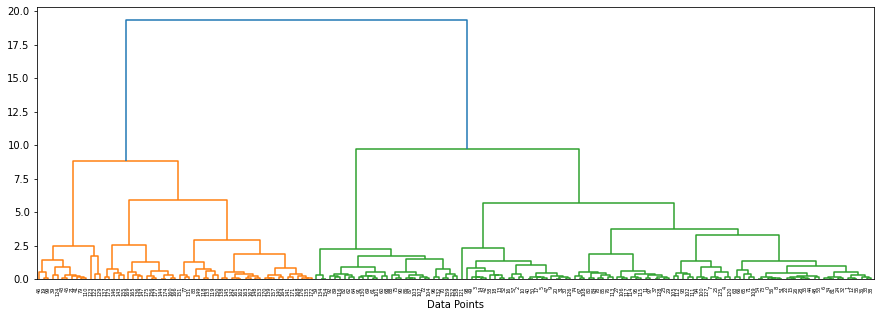

In [6]:
# Visualize Dendogram
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(scaled_df, method = 'ward'))
plt.xlabel('Data Points');


*Escoger clústeres;
Una manera de escoger el número de clústeres donde un algoritmo de agrupamiento aglomerativo se detiene es examinar este dendrograma. Para realizar esto, examinamos el dendrograma para encontrar dónde están las líneas verticales, en general, más largas y trazamos una línea horizontal en ese lugar. El número de líneas verticales donde interseca puede ser un buen número de clústeres.*

In [7]:
# Instantiate clustering
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df)



AgglomerativeClustering()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


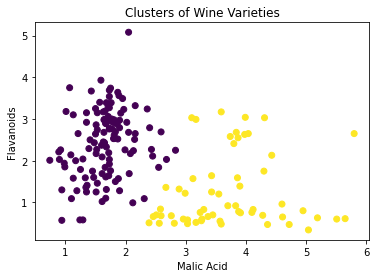

In [9]:
# Save the cluster lables to the dataframe 
df['cluster'] = hc.labels_
# Visualize the clusters
plt.scatter(df['Malic Acid'], df['Flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


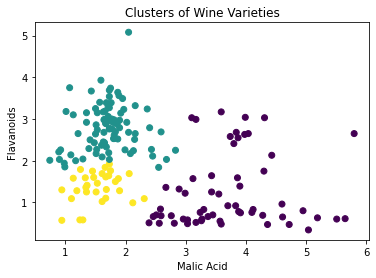

In [10]:
# Try the same thing with 3 clusters
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df)
# Save the cluster lables to the dataframe 
df['cluster'] = hc.labels_
# Visualize the clusters
plt.scatter(df['Malic Acid'], df['Flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');

